At every timestep, `Abacus` identifies particles that belong to the light cone and outputs their positions, velocities, particle IDs, and `HEALPix` pixel number, which can be used to form projected density maps. The pixel orientation is such that the +𝑧 direction coincides with the North Pole. The `HEALPix` maps are output from all particles with resolution of 𝑁side = 16384, which is more than sufficient for performing accurate weak lensing analysis, whereas the particle outputs contain only a 10% subsample of the particles, the so-called `A` and `B` subsamples.

In [14]:
import numpy as np
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import healpy as hp
import asdf

from abacusnbody.data.read_abacus import read_asdf
from util import histogram_hp

Let's visualize the HEALPix light cone outputs (containing number of particles per pixel) at the last available global time step (Step 1093), corresponding to `z = 0.1`.

In [11]:
# simulation directory of light cone outputs
sim_name = "AbacusSummit_base_c000_ph006"
# NERSC location
f = read_asdf(f"/global/project/projectdirs/desi/cosmosim/Abacus//{sim_name:s}/lightcones/heal/LightCone0_heal_Step1093.asdf")
print("Redshift = ", f['header']['Redshift'])
print("Observer location relative to all three boxes = ", np.array(f['header']['LightConeOrigins']).reshape(-1, 3))
heal = f['data']['heal'][:]

Redshift =  0.100969282127725
Observer location relative to all three boxes =  [[ -990.  -990.  -990.]
 [ -990.  -990. -2990.]
 [ -990. -2990.  -990.]]


In [16]:
# plot with healpy in Mollweide projection
nside = 16384 # resolution of healpix maps
npix = hp.nside2npix(nside)
rho = np.zeros(npix, dtype=np.float32)
rho = histogram_hp(rho, heal)

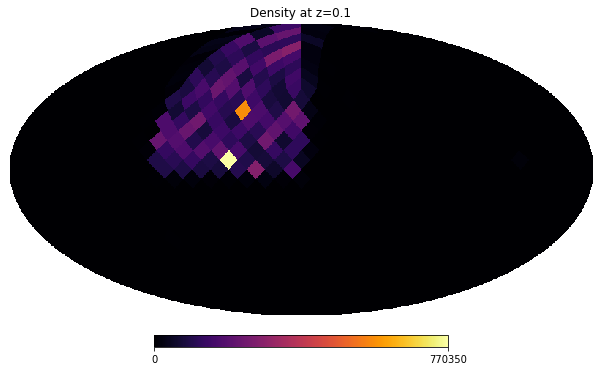

In [29]:
rho = hp.ud_grade(rho, nside_out=8, order_in='NESTED', power=-2)
hp.mollview(rho, nest=True, title="Density at z=0.1", cmap='inferno')

Let's visualize the positions of the subsampled `A` and `B` particles for the original box observer at Step 1093.

In [31]:
# simulation directory of light cone outputs
sim_name = "AbacusSummit_base_c000_ph006"
# NERSC location
f = read_asdf(f"/global/project/projectdirs/desi/cosmosim/Abacus//{sim_name:s}/lightcones/rv/LightCone0_rv_Step1093.asdf")
print(f['pos'][:2])
print(f['vel'][:2])

      pos [3]       
--------------------
-920.322 .. -703.782
-920.894 .. -703.562
        vel [3]        
-----------------------
64.453125 .. -32.226562
 73.24219 .. -38.085938


Text(0.5, 0, 'Z [Mpc/h]')

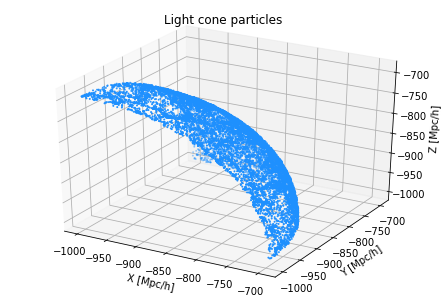

In [34]:
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
  
# creating the plot
ax.scatter(f['pos'][::100, 0], f['pos'][::100, 1], f['pos'][::100, 2], s=1, color='dodgerblue')
  
# setting title and labels
ax.set_title("Light cone particles")
ax.set_xlabel('X [Mpc/h]')
ax.set_ylabel('Y [Mpc/h]')
ax.set_zlabel('Z [Mpc/h]')